In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming df is your DataFrame and 'Feature17' has missing values
imputer = IterativeImputer(max_iter=100, tol=1e-3)

df = pd.read_csv('data/iith_foml_2023_train.csv')
# Fit the imputer model on the dataset to learn the data patterns
imputer.fit(df)

# Transform the dataset to replace missing values
df_imputed = imputer.transform(df)

# Convert back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Check the imputation
print(df_imputed['Feature 17'])

0       8954.554344
1       4900.005000
2      10000.004000
3       -867.934081
4        -55.260168
           ...     
989     5375.962686
990     -579.847919
991     1000.002000
992     -603.569399
993     -650.663889
Name: Feature 17, Length: 994, dtype: float64


In [29]:
df = pd.read_csv('data/iith_foml_2023_train.csv')

In [30]:
df.columns

Index(['Feature 1 (Discrete)', 'Feature 2 (Discrete)', 'Feature 3 (Discrete)',
       'Feature 4 (Discrete)', 'Feature 5 (Discrete)', 'Feature 6 (Discrete)',
       'Feature 7 (Discrete)', 'Feature 8 (Discrete)', 'Feature 9',
       'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14',
       'Feature 15', 'Feature 16', 'Feature 17', 'Feature 18',
       'Feature 19 (Discrete)', 'Feature 20 (Discrete)',
       'Feature 21 (Discrete)', 'Feature 22 (Discrete)',
       'Feature 23 (Discrete)', 'Feature 24', 'Target Variable (Discrete)'],
      dtype='object')

In [31]:
mean_value = df['Feature 17'].mean()
median_value = df['Feature 17'].median()
mode_value = df['Feature 17'].mode().iloc[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: 3814.4205156250005
Median: 1500.003
Mode: 1400.001


In [32]:
sum = 0
for i in df["Feature 17"]:
  if(i == 1400.001):
    sum += 1
print(sum)

11


In [33]:
for column in df.columns:
   if df[column].isnull().any():
     mode_value = df[column].mode().iloc[0]
     df[column].fillna(mode_value, inplace=True)

In [34]:
df.head()

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
0,1404,12,64,14,3,1,1,1,110.502,35775.2,...,556.3,1400.001,15.04,104,12,2,32,1409,37677.1,1
1,909,0,235,32,1,1,1,1,-40.448,35779.4,...,2200.3,4900.005,12.03,20,1,0,13,909,25239.1,1
2,654,3,175,2,1,1,1,1,-27.445,35770.4,...,1973.3,10000.004,13.01,1,1,0,13,654,27683.5,1
3,1372,12,382,14,2,0,1,0,0.001,509.2,...,556.3,1400.001,15.01,313,12,10,54,1377,39363.2,0
4,786,3,199,2,1,0,1,0,0.001,612.1,...,556.3,1400.001,15.01,171,1,5,11,786,40044.4,2


In [35]:
X = df_imputed.iloc[:, :-1]
y = df_imputed.iloc[:, -1]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (994, 24)
Shape of y: (994,)


In [36]:
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

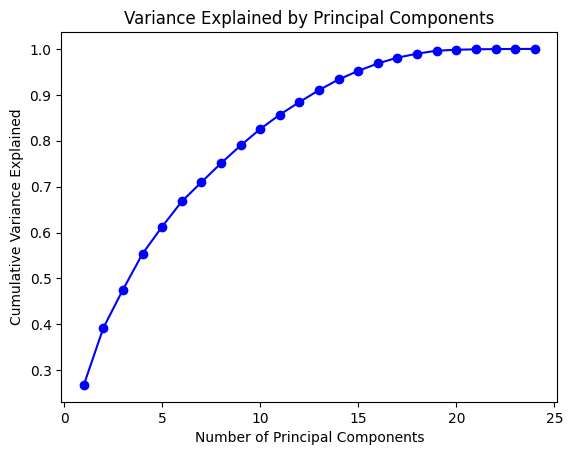

In [37]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the variance explained by each component
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [38]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_standardized)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

In [39]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.776267,2.505985,-0.803204,-0.109152,0.210382,-0.230156,-0.476913,1.624930
1,2.911820,1.244803,-0.125866,0.076968,-0.090643,-1.117105,-0.134756,-1.430680
2,3.544434,-0.025795,-0.105763,0.790663,-0.202533,-0.746360,-0.137202,-0.970926
3,-3.677697,2.905544,-0.758562,-0.006818,-0.681125,-0.603446,0.164082,-0.125523
4,-2.300194,-0.332876,-0.727363,0.246585,-1.680454,-0.540807,-0.634480,-0.166497
...,...,...,...,...,...,...,...,...
989,-2.140518,2.467918,-1.188260,1.847621,-0.951799,-0.259776,0.275957,0.274214
990,-3.438115,2.119684,-0.454261,0.519125,-1.031590,-0.845354,0.273939,0.116700
991,0.017215,-0.998903,1.561549,-0.587815,0.614505,-0.144231,0.628803,0.613158
992,-2.805305,0.843002,-0.709855,-0.284283,0.399675,-0.342290,0.470395,-0.206870


In [40]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

print("Shape of train_x:", train_x.shape)
print("Shape of val_x:", val_x.shape)
print("Shape of train_y:", train_y.shape)
print("Shape of val_y:", val_y.shape)


Shape of train_x: (795, 24)
Shape of val_x: (199, 24)
Shape of train_y: (795,)
Shape of val_y: (199,)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()

svm_model.fit(train_x, train_y)

predictions = svm_model.predict(val_x)

accuracy = accuracy_score(val_y, predictions)

print("Accuracy:", accuracy)


Accuracy: 0.7939698492462312


In [42]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

accuracy = accuracy_score(val_y, predictions)

macro_f1 = f1_score(val_y, predictions, average='macro')

print("Accuracy:", accuracy)
print("Macro F1 Score:", macro_f1)
classification_rep = classification_report(val_y, predictions)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.7939698492462312
Macro F1 Score: 0.26756794088193653

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.82      0.84        50
         1.0       0.84      0.98      0.90        91
         2.0       0.53      0.62      0.57        26
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         1
         5.0       0.25      0.12      0.17         8
         6.0       1.00      1.00      1.00        11
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         5
        11.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1

    accuracy                           0.79       199
   macro avg       0.27      0.27      0.27       199
weighted avg       0.73      0.79      0.76 

/home/goatsadmin/.pyvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/goatsadmin/.pyvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/goatsadmin/.pyvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize XGBoost model
xgb_model = XGBClassifier()

le = LabelEncoder()
train_y = le.fit_transform(train_y)

# Train the model on the training data
xgb_model.fit(train_x, np.asarray(train_y, dtype=int))

# Make predictions on the validation data
xgb_predictions = xgb_model.predict(val_x)

# Calculate accuracy and macro F1 score
xgb_accuracy = accuracy_score(val_y, xgb_predictions)
xgb_macro_f1 = f1_score(val_y, xgb_predictions, average='macro')

# Display results
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Macro F1 Score:", xgb_macro_f1)

# Classification report for more details
xgb_classification_rep = classification_report(val_y, xgb_predictions)
print("\nXGBoost Classification Report:\n", xgb_classification_rep)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16], got [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17]

In [ ]:
print("Unique classes in train_y:", train_y.unique())
print("Unique classes in val_y:", val_y.unique())


Unique classes in train_y: [ 6  8  0  1  2  7  5 14 10  3  9 12 15 13  4 16 17]
Unique classes in val_y: [ 1  8  2  0 15  3  6  7  5 11  4 13 14]


In [ ]:
for i in df["Feature 7 (Discrete)"]:
  if(i >11):
    print('hi')

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [ ]:
for i in train_y:
  if( i == 15):
    print(i)

15
15
15
